In [1]:
import numpy as np
from EuropeanOption import EuropeanOption, implied_volatility
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
from math import exp

In [2]:
S0_base = 100     # USD
K_base = 100      # USD
T_base = 1        # Year(s)
r_base = 0.05     # 5%
sigma_base = 0.3  # 30%

call_base = EuropeanOption(S0_base,K_base,T_base,r_base,sigma_base,'call')
put_base = EuropeanOption(S0_base,K_base,T_base,r_base,sigma_base,'put')

S0_range = np.linspace(S0_base * 0.5, S0_base * 1.5, 100)           # S0 from 50% to 150% of the base value
K_range = np.linspace(K_base * 0.5, K_base * 1.5, 100)              # K from 50% to 150% of the base value
T_range = np.linspace(T_base * 0.1, T_base * 2, 100)                # T from 10% to 200% of the base value
r_range = np.linspace(r_base * 0.1, r_base * 2, 100)                # r from 10% to 200% of the base value
sigma_range = np.linspace(sigma_base * 0.1, sigma_base * 2, 100)    # sigma from 10% to 200% of the base value

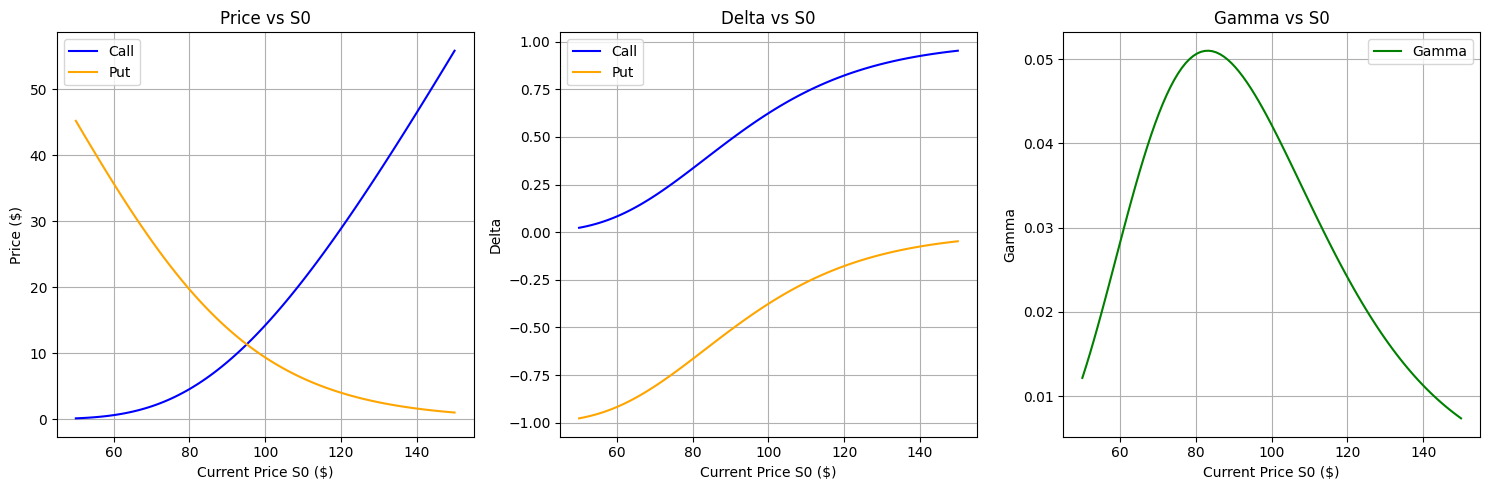

In [28]:
price_vs_S0_call = []
price_vs_S0_put = []
delta_vs_S0_call = []
delta_vs_S0_put = []
gamma_vs_S0 = []

for S0 in S0_range:
    call = EuropeanOption(S0, K_base, T_base, r_base, sigma_base, 'call')
    put = EuropeanOption(S0, K_base, T_base, r_base, sigma_base, 'put')
    price_vs_S0_call.append(call.price)
    price_vs_S0_put.append(put.price)
    delta_vs_S0_call.append(call.delta())
    delta_vs_S0_put.append(put.delta())
    gamma_vs_S0.append(call.gamma())

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

axs[0].plot(S0_range, price_vs_S0_call, label='Call', color='blue')
axs[0].plot(S0_range, price_vs_S0_put, label='Put', color='orange')
axs[0].set_ylabel('Price ($)')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xlabel('Current Price S0 ($)')
axs[0].set_title(f'Price vs S0')

axs[1].plot(S0_range, delta_vs_S0_call, label='Call', color='blue')
axs[1].plot(S0_range, delta_vs_S0_put, label='Put', color='orange')
axs[1].set_ylabel('Delta')
axs[1].legend()
axs[1].set_xlabel('Current Price S0 ($)')
axs[1].set_title(f'Delta vs S0')
axs[1].grid(True)

axs[2].plot(S0_range, gamma_vs_S0, label='Gamma', color='green')
axs[2].set_xlabel('Current Price S0 ($)')
axs[2].set_ylabel('Gamma')
axs[2].legend()
axs[2].set_title(f'Gamma vs S0')
axs[2].grid(True)

plt.tight_layout()
plt.show()

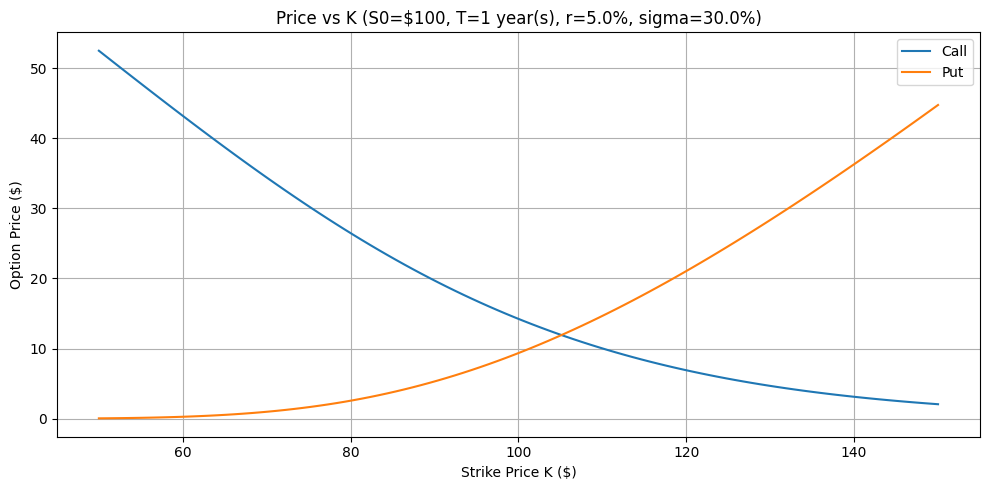

In [29]:
price_vs_K_call = []
price_vs_K_put = []

for K in K_range:
    price_vs_K_call.append(EuropeanOption(S0_base,K,T_base,r_base,sigma_base,'call').price)
    price_vs_K_put.append(EuropeanOption(S0_base,K,T_base,r_base,sigma_base,'put').price)

plt.figure(figsize=(10,5))
plt.plot(K_range,price_vs_K_call,label='Call')
plt.plot(K_range,price_vs_K_put,label='Put')
#plt.plot([K_base], [call_base.price], label='Base Call',marker='^',color='blue',markersize=8)
#plt.plot([K_base], [put_base.price], label='Base Put',marker='^',color='orange',markersize=8)
plt.legend()
plt.grid()
plt.ylabel('Option Price ($)')
plt.xlabel("Strike Price K ($)")
plt.title(f"Price vs K (S0=${S0_base}, T={T_base} year(s), r={r_base*100}%, sigma={sigma_base*100}%)")
plt.tight_layout()
plt.show()

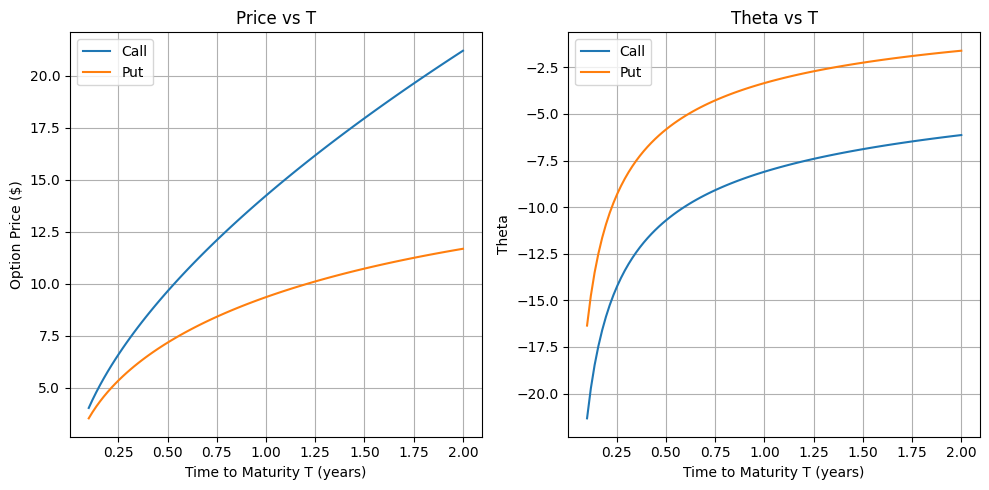

In [39]:
price_vs_T_call = []
price_vs_T_put = []
theta_vs_T_call = []
theta_vs_T_put = []

for T in T_range:
    call, put = EuropeanOption(S0_base,K_base,T,r_base,sigma_base,'call'), EuropeanOption(S0_base,K_base,T,r_base,sigma_base,'put')
    price_vs_T_call.append(call.price)
    price_vs_T_put.append(put.price)
    theta_vs_T_call.append(call.theta())
    theta_vs_T_put.append(put.theta())

fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].plot(T_range,price_vs_T_call,label='Call')
axs[0].plot(T_range,price_vs_T_put,label='Put')
axs[0].set_ylabel('Option Price ($)')
axs[0].set_xlabel("Time to Maturity T (years)")
axs[0].grid()
axs[0].set_title("Price vs T")
axs[0].legend()

axs[1].plot(T_range,theta_vs_T_call,label='Call')
axs[1].plot(T_range,theta_vs_T_put,label='Put')
axs[1].set_ylabel('Theta')
axs[1].set_xlabel("Time to Maturity T (years)")
axs[1].grid()
axs[1].set_title("Theta vs T")
axs[1].legend()

plt.tight_layout()
plt.show()

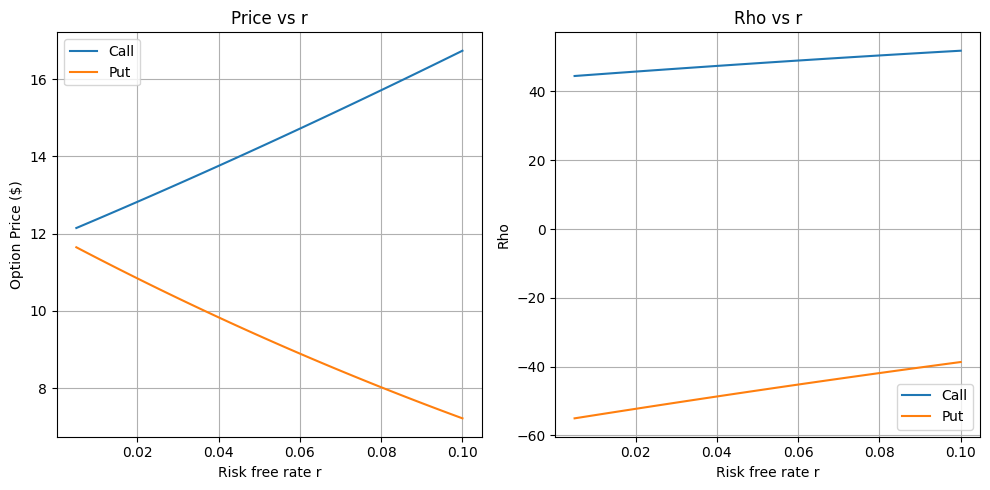

In [40]:
price_vs_r_call = []
price_vs_r_put = []
rho_vs_r_call = []
rho_vs_r_put = []

for r in r_range:
    call, put = EuropeanOption(S0_base,K_base,T_base,r,sigma_base,'call'), EuropeanOption(S0_base,K_base,T_base,r,sigma_base,'put')
    price_vs_r_call.append(call.price)
    price_vs_r_put.append(put.price)
    rho_vs_r_call.append(call.rho())
    rho_vs_r_put.append(put.rho())

fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].plot(r_range,price_vs_r_call,label='Call')
axs[0].plot(r_range,price_vs_r_put,label='Put')
axs[0].set_ylabel('Option Price ($)')
axs[0].set_xlabel("Risk free rate r")
axs[0].grid()
axs[0].set_title("Price vs r")
axs[0].legend()

axs[1].plot(r_range,rho_vs_r_call,label='Call')
axs[1].plot(r_range,rho_vs_r_put,label='Put')
axs[1].set_ylabel('Rho')
axs[1].set_xlabel("Risk free rate r")
axs[1].grid()
axs[1].set_title("Rho vs r")
axs[1].legend()

plt.tight_layout()
plt.show()

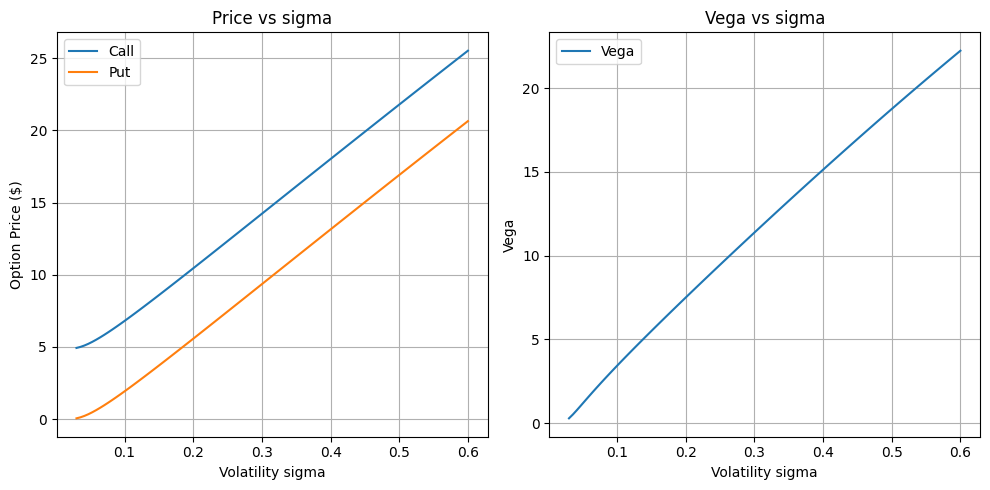

In [44]:
price_vs_sigma_call = []
price_vs_sigma_put = []
vega_vs_sigma_call = []

for sigma in sigma_range:
    call, put = EuropeanOption(S0_base,K_base,T_base,r_base,sigma,'call'), EuropeanOption(S0_base,K_base,T_base,r_base,sigma,'put')
    price_vs_sigma_call.append(call.price)
    price_vs_sigma_put.append(put.price)
    vega_vs_sigma_call.append(call.vega())

fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].plot(sigma_range,price_vs_sigma_call,label='Call')
axs[0].plot(sigma_range,price_vs_sigma_put,label='Put')
axs[0].set_ylabel('Option Price ($)')
axs[0].set_xlabel("Volatility sigma")
axs[0].grid()
axs[0].set_title("Price vs sigma")
axs[0].legend()

axs[1].plot(sigma_range,vega_vs_sigma_call,label='Vega')
axs[1].set_ylabel('Vega')
axs[1].set_xlabel("Volatility sigma")
axs[1].grid()
axs[1].set_title("Vega vs sigma")
axs[1].legend()

plt.tight_layout()
plt.show()


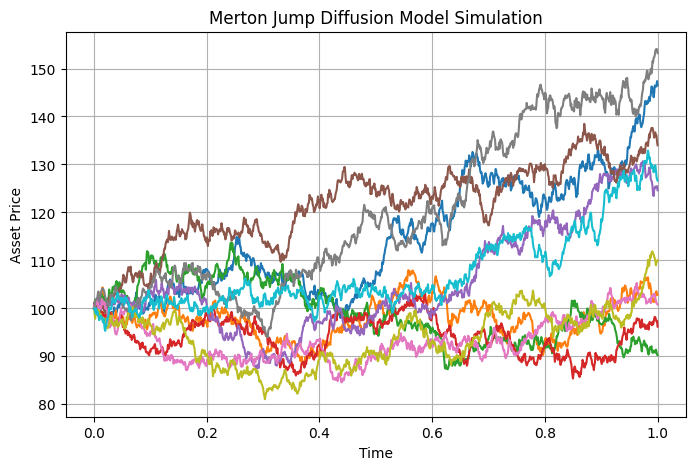

In [51]:
def simulate_jump_diffusion(S0, mu, sigma, T, M, dt, lambda_j, mu_j, sigma_j):
    """
    Simulates a path of the Merton jump diffusion model.

    Parameters:
    - S0: Initial asset price.
    - mu: Drift component.
    - sigma: Volatility of the continuous part.
    - T: Time to maturity.
    - M: Number of steps.
    - dt: Time increment.
    - lambda_j: Intensity of jumps.
    - mu_j: Mean of jump size.
    - sigma_j: Volatility of jump size.
    
    Returns:
    - A numpy array representing the asset price path.
    """
    S = np.zeros(M)
    S[0] = S0

    for t in range(1, M):
        Z = np.random.normal(0, 1)
        N = np.random.poisson(lambda_j * dt)
        J = np.random.normal(mu_j, sigma_j) if N > 0 else 0
        S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z + J)

    return S

np.random.seed(42)

# Parameters
S0 = 100
mu = 0.05
sigma = 0.2
T = 1.0
M = 1000
dt = T / M
lambda_j = 0.1
mu_j = 0.02
sigma_j = 0.1

# Simulate path
paths = []
for i in range(10):
    paths.append(simulate_jump_diffusion(S0, mu, sigma, T, M, dt, lambda_j, mu_j, sigma_j))

# Plot the simulated path
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
for path in paths:
    plt.plot(np.linspace(0, T, M), path)
plt.title('Merton Jump Diffusion Model Simulation')
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.grid()
plt.show()


In [9]:
market_prices_call = np.zeros((len(K_range), len(T_range)))
market_prices_put = np.zeros((len(K_range), len(T_range)))
for i, K in enumerate(K_range):
    for j, T in enumerate(T_range):
        market_prices_call[i, j] = EuropeanOption(S0_base, K, T, r_base, sigma=0.25, type='call').price + K*exp(-r_base*T)
        market_prices_put[i, j] = EuropeanOption(S0_base, K, T, r_base, sigma=0.25, type='put').price + K*exp(-r_base*T)

implied_vols_call = np.zeros_like(market_prices_call)
implied_vols_put = np.zeros_like(market_prices_put)
for i, K in enumerate(K_range):
    for j, T in enumerate(T_range):
        implied_vols_call[i, j] = implied_volatility(market_prices_call[i, j], S0_base, K, T, r_base, 'call')
        implied_vols_put[i, j] = implied_volatility(market_prices_put[i, j], S0_base, K, T, r_base, 'put')

c:\Users\Lenovo\Desktop\Projects\Black & Scholes Implementation\EuropeanOption.py:55: RuntimeWarning: divide by zero encountered in divide
  d1 = (log(self._S0 / self._K) + (self._r + self._sigma**2 / 2) * self._T) / (self._sigma * np.sqrt(self._T))


In [10]:
def plot_vol_surface(K_range: np.ndarray, T_range: np.ndarray, implied_vols_call: np.ndarray, implied_vols_put: np.ndarray) -> None:
    K_grid, T_grid = np.meshgrid(K_range, T_range)

    surface_call = go.Surface(
        x=K_grid,
        y=T_grid,
        z=implied_vols_call.T,  # Transpose to align with the grid
        colorscale='Viridis',  # Use the 'Viridis' colorscale for the call surface
        colorbar=None,  # Deactivate the colorbar for the call surface
        opacity=0.9  # Slightly transparent for better visualization overlap
    )

    surface_put = go.Surface(
        x=K_grid,
        y=T_grid,
        z=implied_vols_put.T,  # Transpose to align with the grid
        #colorscale='Cividis',  # Use a different 'Cividis' colorscale for the put surface
        colorbar=None,  # Deactivate the colorbar for the put surface
        opacity=0.9  # Slightly transparent for better visualization overlap
    )

    layout = go.Layout(
        title='Implied Volatility Surface',
        scene=dict(
            xaxis=dict(title='Strike Price (K)'),
            yaxis=dict(title='Maturity (T)'),
            zaxis=dict(title='Implied Volatility'),
        ),
        autosize=False,
        width=1200,  # Increase the width of the plot
        height=800,  # Increase the height of the plot
    )

    fig = go.Figure(data=[surface_call, surface_put], layout=layout)
    pio.show(fig)

plot_vol_surface(K_range, T_range, implied_vols_call, implied_vols_put)